In [2]:
cd "drive/MyDrive/Citadel Datathon 2023"

/content/drive/MyDrive/Citadel Datathon 2023


In [3]:
ls

 codes/   data/   df_with_importance.csv  'meeting minutes'/


In [6]:
import pandas as pd
df = pd.read_csv("df_with_importance.csv")
X = df[['DEC_LONG', 'DEC_LAT']]
Y = df['importance_result']


In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=22)
kmeans.fit(X, sample_weight = Y)   

labels = kmeans.predict(X)  
centroids = kmeans.cluster_centers_  

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import json
from matplotlib import cm

In [40]:

districts = gpd.read_file("data/Data Open 2023 Additional Data/Boundaries_District.geojson")

In [17]:
pip install contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 39.6 MB/s eta 0:00:00


,geometry
0,POINT (-75.19910 39.93090)
1,POINT (-75.19910 39.93090)
2,POINT (-75.18980 39.91910)
3,POINT (-75.18790 39.91420)
4,POINT (-75.19680 39.89300)
...,...
48314,POINT (-75.15800 40.01010)
48315,POINT (-75.18370 40.03060)
48316,POINT (-75.19060 40.00090)
48317,POINT (-75.17230 40.00790)


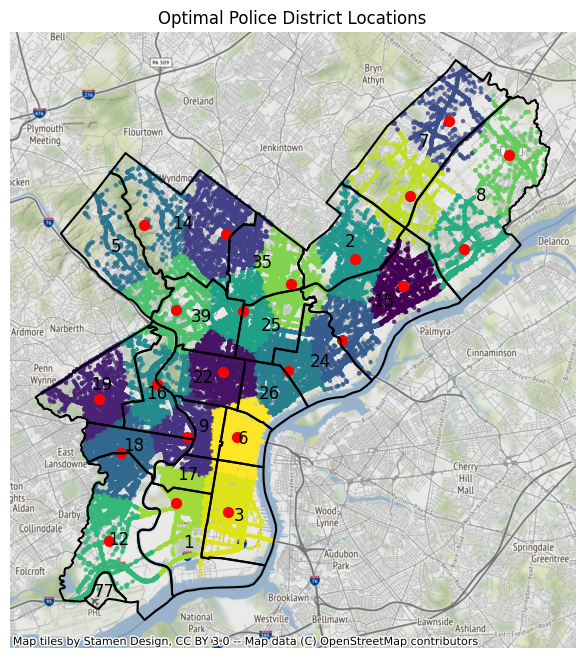

In [54]:
import geopandas
import contextily as cx
districts_wm = districts.to_crs(epsg=3857)
fig, ax = plt.subplots(1, 1,figsize=(8,8))
gpd.GeoDataFrame(pd.DataFrame(), crs="EPSG:4326", geometry=[Point(xy) for xy in zip(df['DEC_LONG'], df['DEC_LAT'])]).to_crs(epsg=3857).plot(marker='o', markersize=5, ax=ax, alpha=0.7, c=labels)
districts_wm.boundary.plot(ax=ax, color='k')
gpd.GeoDataFrame(pd.DataFrame(), crs="EPSG:4326", geometry=[Point(xy) for xy in zip(centroids)]).to_crs(epsg=3857).plot(marker='o', color='red', markersize=50, ax=ax, alpha=1)
cx.add_basemap(ax)

for l,name in zip(districts_wm.centroid, districts.DISTRICT_):
    plt.text(l.x,l.y,name,ha='center', va='center',fontsize='12')

ax.set_axis_off()
ax.set_title('Optimal Police District Locations');